In [1]:
# Twitter Sentiment Analysis on SPY using VADER

In [1]:
import tweepy
import pandas as pd
consumer_key = "dFhoMiB8aIYaBqry5OKMuVEs2"
consumer_secret = "D5CXxn1hwatRd9bEHTJkRAOoFowGyeLnANmpcHW7kmn35iYM0G"
access_token = "1542288001631506436-iaYMHTYTSmx62ZtELOGvF2p7XFQ9ZR"
access_token_secret= "S4spt3ODtDEHETO4wML5CChWx8rAwkj5pv4fobWoV24o9"
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [11]:
search_words = 'SPY', 'Bullish', 'Bearish' #individually collected tweets for 5 different keywords
date_since = '2022-01-01'
tweets = tweepy.Cursor(api.search_tweets, q=search_words, lang="en", since_id=date_since).items(1000)
tweets

In [12]:
tweet_details = [[tweet.text, tweet.user.screen_name, tweet.user.location,tweet.created_at ] for tweet in tweets]

In [13]:
tweet_df = pd.DataFrame(data=tweet_details, columns=["text","user","location", "date" ])
#saving the dataframe into csv file
tweet_df.to_csv ('tweets.csv', index = False, header=True)

In [14]:
import glob
from path import Path
#Use glob to match the pattern ‘csv’
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
df_tweets = pd.read_csv(Path('tweets.csv'), 
    parse_dates=True, 
    infer_datetime_format=True
)
#display the first 10 tweets
df_tweets.tail(10)

,text,user,location,date
474,🇺🇸 Sentiment\n\nInvestor sentiment is very bea...,ISABELNET_SA,Luxembourg,2022-06-21 10:15:45+00:00
475,RT @PrimeTrading_: PT daily Update &amp; Focus...,icedogMark,United States,2022-06-21 10:15:15+00:00
476,There’s a time to be bullish and a time to be ...,girldadninja,NaN,2022-06-21 08:03:53+00:00
477,Change of the plan for tmr: 3733 as pivot.\n\n...,KirkyTrades,"Taipei City, Taiwan",2022-06-21 05:36:55+00:00
478,$BTC &gt; 20k bullish week \n$BTC &lt; 20k bea...,NP_Trader01,Money Printer 🖨💰,2022-06-21 01:31:34+00:00
479,RT @themarketbear: /NQ /ES $SPY $QQQ - It’s in...,kenr0966,"41.136801,-73.986265",2022-06-21 01:08:09+00:00
480,/NQ /ES $SPY $QQQ - It’s intriguing that many ...,themarketbear,United States,2022-06-21 00:50:55+00:00
481,PT daily Update &amp; Focuslist is sent 🖊️\n\n...,PrimeTrading_,Canada,2022-06-21 00:38:59+00:00
482,@faststocknewss Is this usually bullish or bea...,inevergohome,On top of the world,2022-06-21 00:06:38+00:00
483,RT @ThetaWarrior: DISCLAIMER: HIGH RISK #Lotto...,Thetalwarrior,USA (NYSE),2022-06-20 21:38:23+00:00


In [15]:
df_tweets.shape

(484, 4)

In [16]:
df_tweets.duplicated(subset=['text']).sum()
df_tweets=df_tweets.drop_duplicates(subset=['text'])
df_tweets.shape

(223, 4)

In [17]:
import re
# function for twitter text cleaning
def tweet_cleaner(text):
    #remove RT
    text = re.sub("RT @[\w]*:","",text)
    #remove twitter handles (@user)
    text = re.sub("(@[A-Za-z0-9_]+)","", text)
    #remove url links
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    # remove whitespaces
    text = ' '.join(text.split())
    return text
#Apply text cleaning function to text column in df_tweets dataframe
df_tweets['text'] = df_tweets['text'].apply(lambda x:tweet_cleaner(x))

In [18]:
#downloading the vader lexicon from nltk
import nltk
nltk.download('vader_lexicon')
#importing sentimentintensityanaylzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\WilsonRosa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
df_tweets['scores'] = df_tweets['text'].apply(lambda text: sid.polarity_scores(text))
df_tweets.head(10)

,text,user,location,date,scores
0,🔮 $spy 🔮 - TARGETS: Current trend is Bearish -...,elix007,"Virginia, USA",2022-06-30 11:55:41+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,Here are some common chart patterns on both th...,AbuHass94901359,NaN,2022-06-30 11:44:51+00:00,"{'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'comp..."
2,Last day of the quarter today. Are you bullish...,blxckbirdoption,NaN,2022-06-30 11:06:45+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,Icebergs algo appears to be painting another i...,lunatictrader1,NaN,2022-06-30 10:10:59+00:00,"{'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'comp..."
6,I hear a lot about being bullish and/or bearis...,LoxiosCura,NaN,2022-06-30 07:29:04+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
7,$SPY flow shortly before and after close today...,TradesBell,NaN,2022-06-30 06:52:01+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
8,#SPY - Daily rising wedge $SPY daily looking b...,CeylonTrader,Houston TX,2022-06-30 04:00:23+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,It depends on what financial instruments and t...,Redbank199,NaN,2022-06-30 03:57:35+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
10,$SPY I can't call it but if I did $SPY $372 if...,Jonatha26629627,NaN,2022-06-30 02:39:43+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
11,$QQQ $SPY my whole feed is bearish. Everyone b...,MrVinceVaughn,NaN,2022-06-30 01:20:09+00:00,"{'neg': 0.11, 'neu': 0.89, 'pos': 0.0, 'compou..."


In [35]:
def sentimentPredict(sentiment):
    if sentiment['compound'] >= 0.05:
        return "Positive"
    elif sentiment['compound'] <= -0.05: 
        return "Negative"
    else:
        return "Neutral"

    
final_df = df_tweets
final_df['label'] = df_tweets['scores'].apply(lambda x: sentimentPredict(x))
final_df.head(10)

,text,user,location,date,scores,label
0,🔮 $spy 🔮 - TARGETS: Current trend is Bearish -...,elix007,"Virginia, USA",2022-06-30 11:55:41+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
1,Here are some common chart patterns on both th...,AbuHass94901359,NaN,2022-06-30 11:44:51+00:00,"{'neg': 0.0, 'neu': 0.901, 'pos': 0.099, 'comp...",Positive
2,Last day of the quarter today. Are you bullish...,blxckbirdoption,NaN,2022-06-30 11:06:45+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3,Icebergs algo appears to be painting another i...,lunatictrader1,NaN,2022-06-30 10:10:59+00:00,"{'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'comp...",Negative
6,I hear a lot about being bullish and/or bearis...,LoxiosCura,NaN,2022-06-30 07:29:04+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
7,$SPY flow shortly before and after close today...,TradesBell,NaN,2022-06-30 06:52:01+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
8,#SPY - Daily rising wedge $SPY daily looking b...,CeylonTrader,Houston TX,2022-06-30 04:00:23+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
9,It depends on what financial instruments and t...,Redbank199,NaN,2022-06-30 03:57:35+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
10,$SPY I can't call it but if I did $SPY $372 if...,Jonatha26629627,NaN,2022-06-30 02:39:43+00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
11,$QQQ $SPY my whole feed is bearish. Everyone b...,MrVinceVaughn,NaN,2022-06-30 01:20:09+00:00,"{'neg': 0.11, 'neu': 0.89, 'pos': 0.0, 'compou...",Negative


In [36]:
# https://prastuti.medium.com/twitter-sentiment-analysis-on-covid-19-using-vader-82f030b686a9

C:\Users\WilsonRosa\anaconda3\envs\dev\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

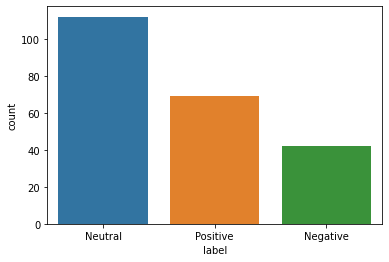

In [37]:
import seaborn as sns
sns.countplot(final_df['label'], label='count')